# **WOMEN'S CLOTHING E-COMMERCE**
## GBA 6410 Summer 2021
Group Member:
1. Monica Feng Chen
2. Nhi Tran
3. Phoebe Tran

## Topic and Background

This dataset is about Women's Clothing E-Commerce, the dataset shows the details about the reviews written by customers and the ratings on how customer graded the products and service. We use 2 algorithms in this project: Topic Modeling and Sentiment Analysis.
Since there is a rating range in this dataset, we would like to analyze to understand what is the portion of each rating point, what made customer decide to rate that level and what is the most topics that customers mentioned, as well as to understand customer's opinions and emotions through the text reviews.  

For Sentiment Analysis, we will learn about the contexts of text and identify and extract subjective information in source material, and help the business  to undertand the social sentiment of their brand, product and service while monitoring online conversations.

We use Topic Modeling to discover the abstract "topic" that occur in customer's review, then we can organize and get some insights to understand the topics that were mentioned in this dataset and what is the trend that customers gave out in this data.

Below are some of the questions we have before start learning this dataset:

1. What is the age/rating distribution?
2. What is the number of purchase by department/class?
3. What is the most discussed topics in customer's reviews?
4. What is the context of the review: positive, neutral or negative?
5. Is it a negative or positive trend of customer reviews of this whole text data?
6. etc...

Then from the answers of those questions, business can monitor brand and product as well as service based on customer feedbacks and understand customer needs and what to improve on their products/service.



## Dataset
- Women's E-Commerce Clothing Reviews ([Source](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews))  

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

`Clothing ID`: Integer Categorical variable that refers to the specific piece being reviewed.  
`Age`: Positive Integer variable of the reviewers age.  
`Title`: String variable for the title of the review.  
`Review Text`: String variable for the review body.  
`Rating`: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.  
`Recommended IND`: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.  
`Positive Feedback Count`: Positive Integer documenting the number of other customers who found this review positive.  
`Division Name`: Categorical name of the product high level division.  
`Department Name`: Categorical name of the product department name.  
`Class Name`: Categorical name of the product class name.  

## Data Preprocessing



#### 1. Importing the libraries

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

In [ ]:
# Gensim package
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# Plotting tools
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

In [ ]:
# Run in python console
import nltk; nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'many', 'some', 'thank', 'think', 'see', 'rather', 'easy', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [ ]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

#### 2. Loading the dataset

After importing all necessary libraries, we import dataset, check the shape and print the first 10 rows with header. Next is to remove the Unnamed column, delete rows with missing value and remove duplicates.


In [ ]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print(df.shape)
df.head(10)

(23486, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [ ]:
# Drop column 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
# Check missing values
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
# Remove rows with missing values
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
# Check shape before removing duplicates
df.shape

(19662, 10)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace = True)
df.shape

(19662, 10)

In [ ]:
df.to_excel('Womens Clothing E-Commerce Reviews-Clean.xlsx')

#### 3. Tokenize Sentenses and Clean

Removing the emails, new line characters, single quotes and then split the sentence into a list of words using gensim "simple_preprocess". Set deacc=True to remove punctuations.

The "simple_preprocess" funtion returns a list of tokens after tokenizing and normalizing them. This function helps to have more effective preprocessing of the corpus.

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline characters
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [ ]:
# Convert to list
data = df['Review Text'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'found', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'could', 'not', 'zip', 'it', 'up', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', 'ok', 'overall', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely', 'but', 'the', 'bottom', 'half', 'had', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', 'net', 'over', 'layers', 'imo', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', 'it']]


#### 4. Build the Bigram, Trigram Models and Lemmatize

Removing the stop words and forming the bigram and trigram using the "phrases" model. We create bigram and trigram because some words have no meaning if standing alone, bigram and trigram will create more meaningful words.

Lemmatize each word to its root form, and keep only Noun, Adjective, Verbs and Adverbs. We use spacy for lemmatization and keep POS tags because they are the onces contributing the most to the meaning of sentences. Then we create the dictionary and corpus.

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['had', 'such', 'high_hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'found', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'could', 'not', 'zip', 'it', 'up', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', 'ok', 'overall', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely', 'but', 'the', 'bottom', 'half', 'had', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', 'net', 'over', 'layers', 'imo', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', 'it']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['really', 'want', 'work', 'initially', 'order', 'petite', 'small', 'usual', 'size', 'find', 'outrageously', 'small', 'small', 'fact', 'zip', 'reorder', 'petite', 'medium', 'overall', 'top', 'half', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layer', 'major', 'design', 'flaw', 'net', 'layer', 'sew', 'directly']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]


## Data Visualization & Descriptive Statistics 

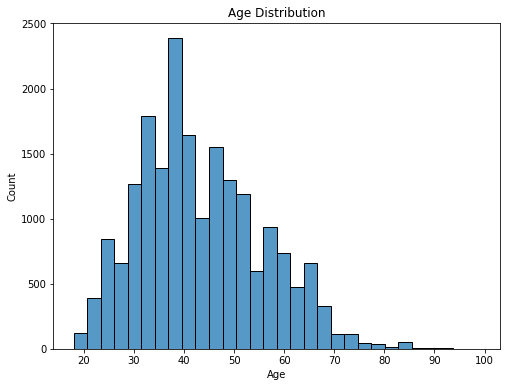

In [ ]:
# Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins = 30)
plt.title('Age Distribution')
plt.show();

This graph shows us that majority of the customers who provided a review are in their late 30s and early 40s. 

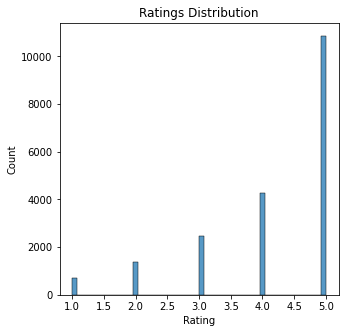

In [ ]:
# Ratings distribution
plt.figure(figsize=(5,5))
sns.histplot(df['Rating'])
plt.title('Ratings Distribution')
plt.show();

The Rating Distribution graph shows us that majority of the reviews are higher than 3, with the most rating is 5.

In [ ]:
# Descriptive statistics
df[['Age', 'Rating']].describe()

,Age,Rating
count,19662.000000,19662.000000
mean,43.260808,4.183145
std,12.258122,1.112224
min,18.000000,1.000000
25%,34.000000,4.000000
50%,41.000000,5.000000
75%,52.000000,5.000000
max,99.000000,5.000000


This table above shows us that the average age of our customers is 43 and the average rating is above 4.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


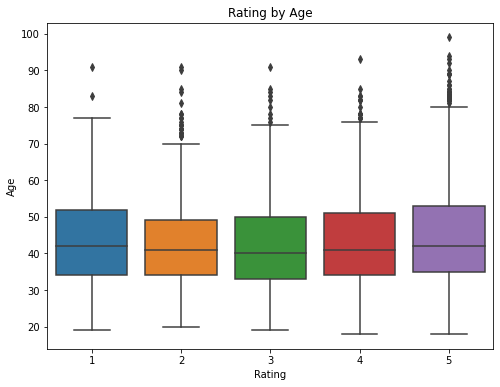

In [ ]:
# Ratings vs. Age
plt.figure(figsize=(8,6))
sns.boxplot('Rating', 'Age', data = df)
plt.title('Rating by Age')
plt.show();

This graph shows us that there is no correlation between age and ratings.

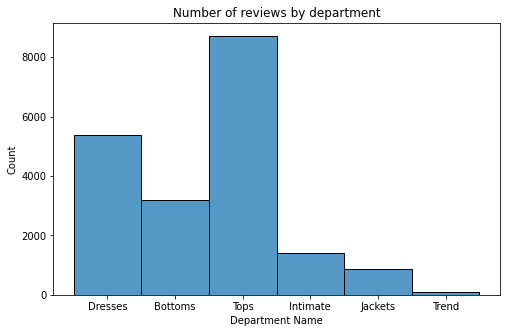

In [ ]:
# Number of purchases by department
plt.figure(figsize=(8,5))
sns.histplot(df['Department Name'])
plt.title('Number of reviews by department')
plt.show();

The Number of Reviews by Department graph shows us that most of the reviews are for Tops and Dresses.

## Data Analysis
- Sentiment Analysis
- Topic Modeling

### Sentiment Analysis

The sentiment analysis using TextBlob returns 2 properties: subjectivity and polarity. 

Polarity is float which lies in the range of [-1,1] where 1 means positive statmement and -1 mean a negative statement.

Subjective sentences generally refer to personal opinion, emotion of judment. It is also a float which lies in the range of [0,1].



In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_analysis(text):
  
  # function for subjectitivty
  def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

  # function to get polarity
  def getPolarity(text):
    return TextBlob(text).sentiment.polarity

  # create two new columns 'Subjectivity' & 'Polarity'
  df['TextBlob_Subjectivity'] = df['Review Text'].apply(getSubjectivity)
  df['TextBlob_Polarity'] = df['Review Text'].apply(getPolarity)

  # transform scores to text-based sentiment labels
  def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
  
  df['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis)

  return df

In [ ]:
sentiment_analysis(df)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.356294,0.073675,Positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.625000,0.550000,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.568750,0.512891,Positive
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.533125,0.178750,Positive
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.607778,0.133750,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.710000,0.552667,Positive
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.708333,0.091667,Positive
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.596429,0.414286,Positive
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.577778,0.322222,Positive


In [ ]:
df['TextBlob_Analysis'].value_counts()

Positive    18443
Negative     1141
Neutral        78
Name: TextBlob_Analysis, dtype: int64

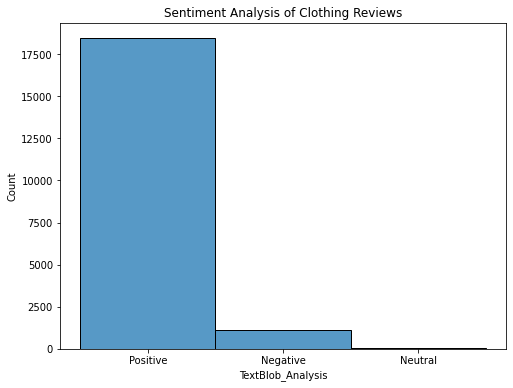

In [ ]:
# Sentiment analysis chart
plt.figure(figsize=(8,6))
sns.histplot(df['TextBlob_Analysis'])
plt.title("Sentiment Analysis of Clothing Reviews")
plt.show();

Around 94% of the reviews are positive based on the chart above.

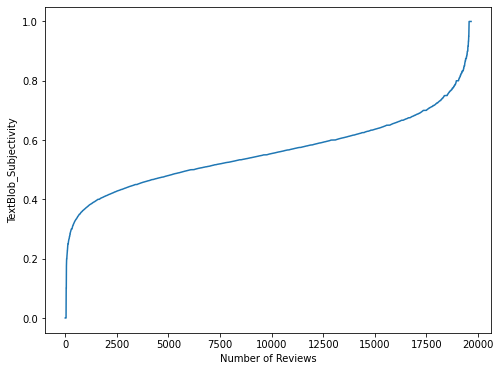

In [ ]:
# Subjectivity chart
plt.figure(figsize=(8,6))
plt.plot(sorted(df['TextBlob_Subjectivity']))
plt.xlabel('Number of Reviews')
plt.ylabel('TextBlob_Subjectivity')
plt.show();

From the chart above, most of the reviews are based on opinions.

In [ ]:
df['Customer_Rating'] = np.where(df['Rating'] > 3, 'Positive',
                                 np.where(df['Rating'] < 3, 'Negative',
                                          'Neutral'))

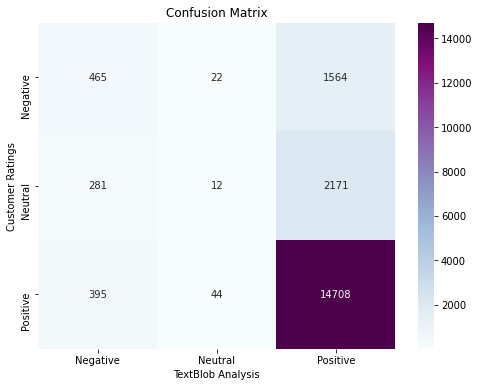

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl

cm = confusion_matrix(df['Customer_Rating'], df['TextBlob_Analysis'])

plt.figure(figsize=(8,6))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap="BuPu");

ax.set_xlabel('TextBlob Analysis');ax.set_ylabel('Customer Ratings'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']);

Here we can see that for the negative ratings provided by the customers, actually majority was predicted as positive from the text review using TextBlob. This also applies to the neutral ratings provided by the customers. For the positive ratings, only a small percentage was predicted as negative and neutral using TextBlob analysis.

### Topic Modeling

Why Gensim? Generate the corpus, score of each words, and use to plot list of words in the topic later on.

LDA topic model was built using LdaModel() function. First to create dictionary, then create corpus and build the LDA model. We picked 20 topics. After runing the code, we got the results show the trained topics with the keywords and weights printed.

In [ ]:
#Build LDA model with Gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
#The score of each word reflect how important the word in the topic 


[(0,
  '0.088*"normally" + 0.066*"actually" + 0.053*"heavy" + 0.047*"flowy" + '
  '0.042*"dark" + 0.041*"favorite" + 0.035*"strap" + 0.033*"type" + '
  '0.028*"one" + 0.024*"night"'),
 (1,
  '0.064*"drape" + 0.056*"knee" + 0.046*"part" + 0.045*"never" + 0.036*"frame" '
  '+ 0.035*"beautifully" + 0.030*"bright" + 0.030*"curve" + 0.028*"wedding" + '
  '0.026*"vibrant"'),
 (2,
  '0.099*"size" + 0.086*"fit" + 0.072*"top" + 0.063*"be" + 0.055*"small" + '
  '0.047*"order" + 0.037*"little" + 0.033*"large" + 0.028*"get" + '
  '0.027*"beautiful"'),
 (3,
  '0.204*"soft" + 0.060*"casual" + 0.060*"different" + 0.050*"tank" + '
  '0.040*"boot" + 0.033*"neckline" + 0.028*"tee" + 0.027*"green" + '
  '0.023*"touch" + 0.022*"flatter"'),
 (4,
  '0.142*"shirt" + 0.076*"time" + 0.060*"first" + 0.060*"have" + '
  '0.054*"compliment" + 0.051*"receive" + 0.037*"always" + 0.034*"embroidery" '
  '+ 0.023*"already" + 0.022*"will"'),
 (5,
  '0.194*"big" + 0.093*"bust" + 0.073*"slightly" + 0.052*"problem" + '
  '

From the topics and weights generated above, we then tried to create some meaningful messages to get more insights:


- Strap dress are styled for night event, consider the marterial if it is heavy

- Positive feedback about drape of dress for wedding occassion. 
 
- Sizing is fit nice with the top, consider that small size run large 

- Tee receives good feedback, style for casual 
 
- Shirts have compliment on the embroidery

- Slight big bustline create roomy issue for the top

- Lace bra gets bad after washing so consider the material 

- Compliment for the fabric can cover stretchly and nicely for the torso

- Dress with belt as a decoration 

- Good compliment for heel and sandal which is lightweight

- Maternity clothes for pregnant women that can cover the hip area and make them look slim


The Perplexity is to measure how hard the model was predicted, the lower the better. and Coherence Score is used to measure how well the topics are extracted.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how hard the model was predicted. lower the better.
#

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.8230353571225155

Coherence Score:  0.28291353036359046


## Data-driven Insights & Recommendation

Word Clouds of Top N Keywords in Each Topic

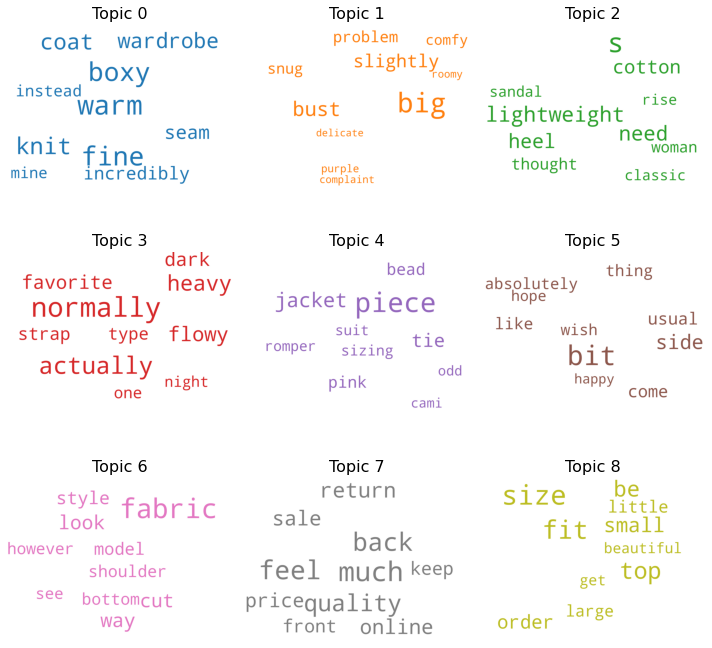

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


We can get the features of each product and how user experiences about it.

**Insight:**
 Topic 4. is about the jacket, we can see that the opinion about jacket is odd, and problem about sizing so we may bring this ideas to the production department to improve the product. 

Topic 1: Good feedback for the coat with warm, knit, fine and incredible compliment 

Topic 6: Fabric has nice fit on customers

Topic 3: Consider the martetial of the strap dress to see if it is heavy


 **Recomendation**:
Check back with the prodution department 

Word Counts of Topic Keywords

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.338524  0.175613       1        1  23.145102
2      0.199608 -0.383037       2        1  19.453214
19     0.121486 -0.139214       3        1   8.093521
18     0.234858  0.203190       4        1   7.757723
11    -0.012212 -0.019781       5        1   3.828156
8     -0.012357 -0.019855       6        1   3.695197
16    -0.023970 -0.010765       7        1   3.523311
4     -0.026894 -0.009309       8        1   3.278129
3     -0.041231  0.002086       9        1   3.008865
10    -0.057085  0.011152      10        1   2.725264
15    -0.055749  0.009987      11        1   2.638298
14    -0.055891  0.010563      12        1   2.436075
6     -0.074591  0.020295      13        1   2.199219
1     -0.072998  0.019655      14        1   2.143838
7     -0.074206  0.020461      15        1   2.088026
17    -0.077310  0.021890      16        1   2.070302
0     -0.074789  0.020243      17        1   2.046851
9     -0.079210  0.022237      18        1   2.021651
5     -0.074163  0.020432      19        1   1.987600
12    -0.081820  0.024154      20        1   1.859659, topic_info=             Term         Freq        Total Category  logprob  loglift
54          dress  8806.000000  8806.000000  Default  30.0000  30.0000
24           size  9043.000000  9043.000000  Default  29.0000  29.0000
7             fit  7879.000000  7879.000000  Default  28.0000  28.0000
38           wear  8877.000000  8877.000000  Default  27.0000  27.0000
36           love  8578.000000  8578.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
569   description    83.533210    84.458440  Topic20  -4.6542   3.9738
1570         name    77.280920    78.206150  Topic20  -4.7320   3.9729
2793        block    64.242557    65.167787  Topic20  -4.9168   3.9705
1355      dressed    60.994347    61.919577  Topic20  -4.9687   3.9697
2440     lavender    58.563070    59.488301  Topic20  -5.0094   3.9691

[640 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
458       5  0.998647   absolutely
760      10  0.993004   accentuate
1641     14  0.988123  accommodate
460      17  0.999229     actually
1090     18  0.996410     addition
...     ...       ...          ...
148       7  0.996387         year
1036      9  0.992658       yellow
1213      6  0.989415    yesterday
308       6  0.994583          yet
291       6  0.993373       zipper

[619 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 3, 20, 19, 12, 9, 17, 5, 4, 11, 16, 15, 7, 2, 8, 18, 1, 10, 6, 13])

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant. 

A model with too many topics or repeated topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.



**Insight**: 

- Problem about the size small and the measuring in shoulder    
- Customer services about the return service for online order may receive bad feedback from customers

**Recomendation**:
Check back with the prodution department to improve the measures of the products and check with customer services department due to bad review to bring in some improvements to give customer higher quality of customer services.

**Sum** **up**

- Determine the target segment for the product: women from 30 to 40 +
- Use the insight from customers to improve the product
- Visualize the data and transform it into informative outputs
